In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import scale

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from xgboost.sklearn import XGBRegressor
import xgboost as xgb

import math

In [44]:
ind_merged_dataset = pd.read_csv("Industrial_regr.csv")

In [45]:
ind_merged_dataset.columns

Index(['Year', 'Month', 'Cents/kWh', 'CLDD', 'TAVG', 'AWND', 'HTDD', 'area',
       'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY', 'industrial_usage', 'Total', 'Population',
       'solar-generation', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

In [46]:
pa_ind_data = ind_merged_dataset.loc[ind_merged_dataset['PA'] == 1]


In [47]:
pa_ind_data = pa_ind_data.drop(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], axis=1)
pa_ind_data

,Year,Month,Cents/kWh,CLDD,TAVG,AWND,HTDD,area,PA,industrial_usage,Total,Population,solar-generation,Season_Fall,Season_Spring,Season_Summer,Season_Winter
37,2014,1,8.48,0.000000,20.140602,8.033333,1382.917293,46055,1,4220,20428268.87,12788313,3,0,0,0,1
87,2014,2,8.65,0.000000,23.232520,7.142308,1161.073171,46055,1,3891,18811217.37,12788022,4,0,0,0,1
137,2014,3,8.18,0.000000,30.912950,8.615385,1048.841727,46055,1,4033,18791215.70,12787732,5,0,1,0,0
187,2014,4,7.42,3.820144,48.134532,8.450000,507.323741,46055,1,3848,17065799.41,12787441,5,0,1,0,0
237,2014,5,7.08,34.808511,59.490780,6.353846,204.695035,46055,1,4018,16941485.04,12787151,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,2019,8,6.38,192.609023,70.703008,4.780000,16.639098,46055,1,4649,21731512.00,12802611,6,0,0,1,0
3437,2019,9,6.21,88.030534,66.169466,5.052000,53.175573,46055,1,4412,19297955.00,12802700,6,1,0,0,0
3487,2019,10,6.31,21.700787,54.696850,6.572000,339.464567,46055,1,4372,17659006.00,12802789,5,1,0,0,0
3537,2019,11,6.28,0.000000,37.236800,7.148000,825.040000,46055,1,4087,18232579.00,12802878,3,1,0,0,0


In [60]:
#split the data first

train, test = train_test_split(pa_ind_data, test_size=0.2)

X_train = train.drop(['Year', 'Month', 'PA', 'industrial_usage', 'Season_Spring', 'area', 'TAVG', 'Total'], axis = 1)

y_train = train['industrial_usage']

X_test = test.drop(['Year', 'Month', 'PA', 'industrial_usage', 'Season_Spring', 'area', 'TAVG', 'Total'], axis = 1)
y_test = test['industrial_usage']

In [61]:
numeric_feature_name = ['Cents/kWh','CLDD', 'AWND', 'HTDD',
                        'Population', 'solar-generation']

categorical_feature_name = ['Year', 'Month', 'Season_Summer', 'Season_Fall', 'Season_Winter']

# scale the train and test data
min_max_scaler = preprocessing.MinMaxScaler()
X_train[numeric_feature_name] = min_max_scaler.fit_transform(X_train[numeric_feature_name])
X_test[numeric_feature_name] = min_max_scaler.transform(X_test[numeric_feature_name])

y_train = (y_train - min(y_train))/(max(y_train) - min(y_train))

In [62]:
def evaluate_performances(y_test, y_pred):
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))
    y_test1, y_pred1 = np.array(y_test), np.array(y_pred)
    print("MAPE:", np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100)

In [63]:
#Visualize the output

def visualize_graph(df_pred):
    fig, axes = plt.subplots(3,1, figsize=(7,15))
    #Plot the result in box plot
    df_pred.plot(title="Actual vs. Predict result box plot",kind='box',ax=axes[0])
    #Plot the scatter plot 
    df_pred.plot.scatter(title="Actual vs. Predict result scatter plot",  x='Actual',y='Predicted', c='DarkBlue',ax=axes[1])
    #Plot the result in terms of kernel density estimation
    df_pred.plot(title="Actual vs. Predict result kernel density estimation", kind='density',ax=axes[2])

In [64]:
K = 5
model = XGBRegressor(objective ='reg:squarederror')
scores = cross_val_score(model, X_train, y_train, cv=K, scoring='neg_mean_squared_error', verbose=False)
avg_rmse = math.sqrt(abs(np.mean(scores)))

print('Average RMSE with {}-fold Cross Validation: {:.3f}'.format(K, avg_rmse))

Average RMSE with 5-fold Cross Validation: 0.159


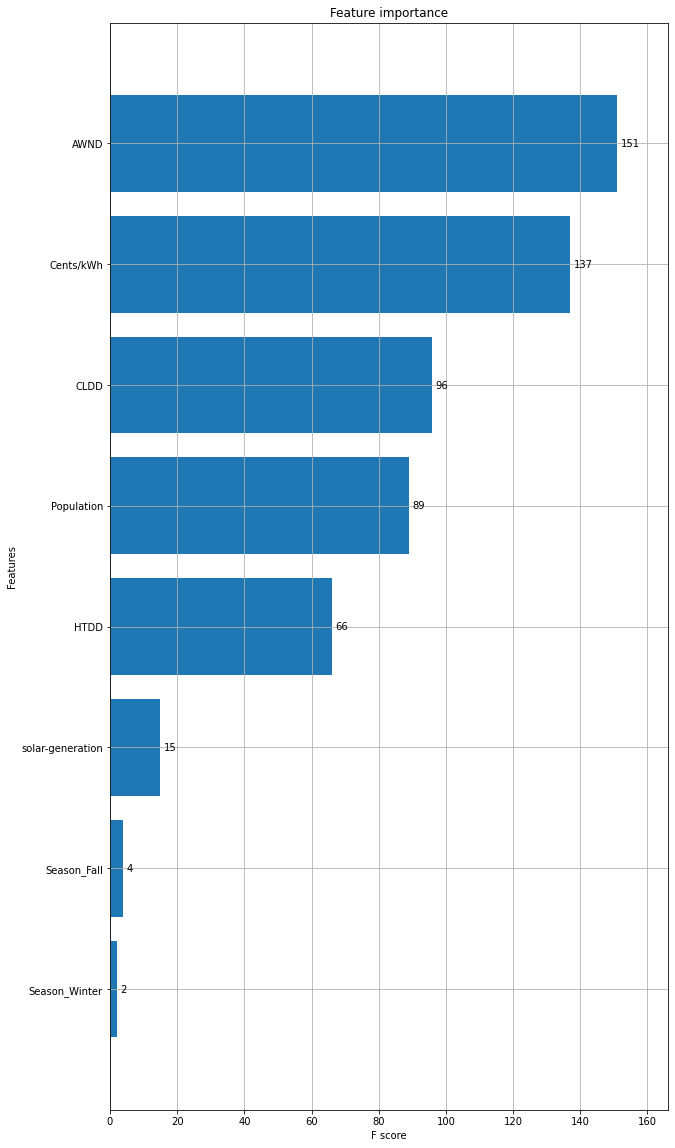

In [65]:
model = XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10,20))
xgb.plot_importance(model, height=0.8, ax=ax)

In [66]:
def sm_regression(X_train,y_train,X_test,y_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    model = sm.OLS(y_train,X_train)
    results = model.fit()
    results.params
    print(results.summary())
    predictions = results.predict(X_test)
    df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    
    return df_pred

In [67]:
sm_regression(X_train, y_train, X_test, y_test)

                            OLS Regression Results                            
Dep. Variable:       industrial_usage   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     9.853
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           2.74e-08
Time:                        13:49:32   Log-Likelihood:                 40.827
No. Observations:                  57   AIC:                            -61.65
Df Residuals:                      47   BIC:                            -41.22
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1159      0.144  

,Actual,Predicted
2087,3999,0.484075
987,4003,0.530791
1287,3835,0.192517
37,4220,0.270120
3487,4372,0.472347
787,3823,0.185439
287,3970,0.427208
2487,3978,0.399828
2137,4176,0.651991
737,4163,0.260138


Mean Absolute Error: 149.54489807292666
Mean Squared Error: 24148.56573197662
Root Mean Squared Error: 155.39808792895948
MAPE: 3.6528094247473026


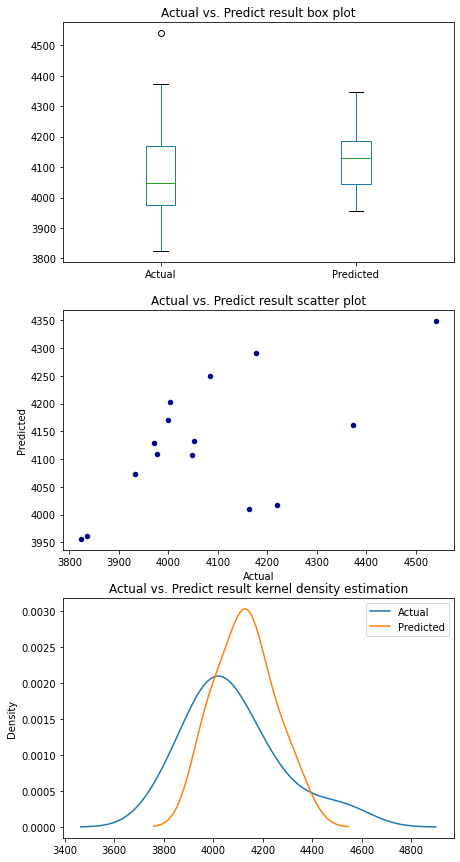

In [68]:
ind_lr = LinearRegression()
ind_lr.fit(X_train, y_train)
ind_predictions = ind_lr.predict(X_test)
ind_predictions = (ind_predictions * (max(y_test) - min(y_test))) + min(y_test)
evaluate_performances(y_test, ind_predictions)
ind_df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': ind_predictions})
visualize_graph(ind_df_pred)

In [69]:
a  = ind_lr.intercept_#截距
b = ind_lr.coef_#回归系数
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 0.11588432051745606 ,回归系数： [-0.02549586  0.25607073 -0.30919665  0.25728501  0.16651926  0.2479906
  0.09793633  0.08344564  0.07017879]


In [108]:
def cal_vif(df):
    features= df[['Cents/kWh', 'CLDD', 'AWND', 'Population']]
    X = add_constant(features)
    vif=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    
    return vif

In [109]:
cal_vif(df_ind_train)

const         3.945398e+06
Cents/kWh     1.461781e+00
CLDD          2.601966e+00
AWND          2.658813e+00
Population    1.382451e+00
dtype: float64

In [58]:
# Visualization
def visualization(y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20))
    fig.suptitle('Predicted and Actual plot')
    ax1.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax1.legend(loc="upper right")
    ax2.plot(range(len(y_pred)),y_pred,'r',label="actual")
    ax2.legend(loc="upper right")
    ax3.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax3.plot(range(len(y_pred)),y_test,'r',label="test")
    ax3.legend(loc="upper right")
    plt.show()

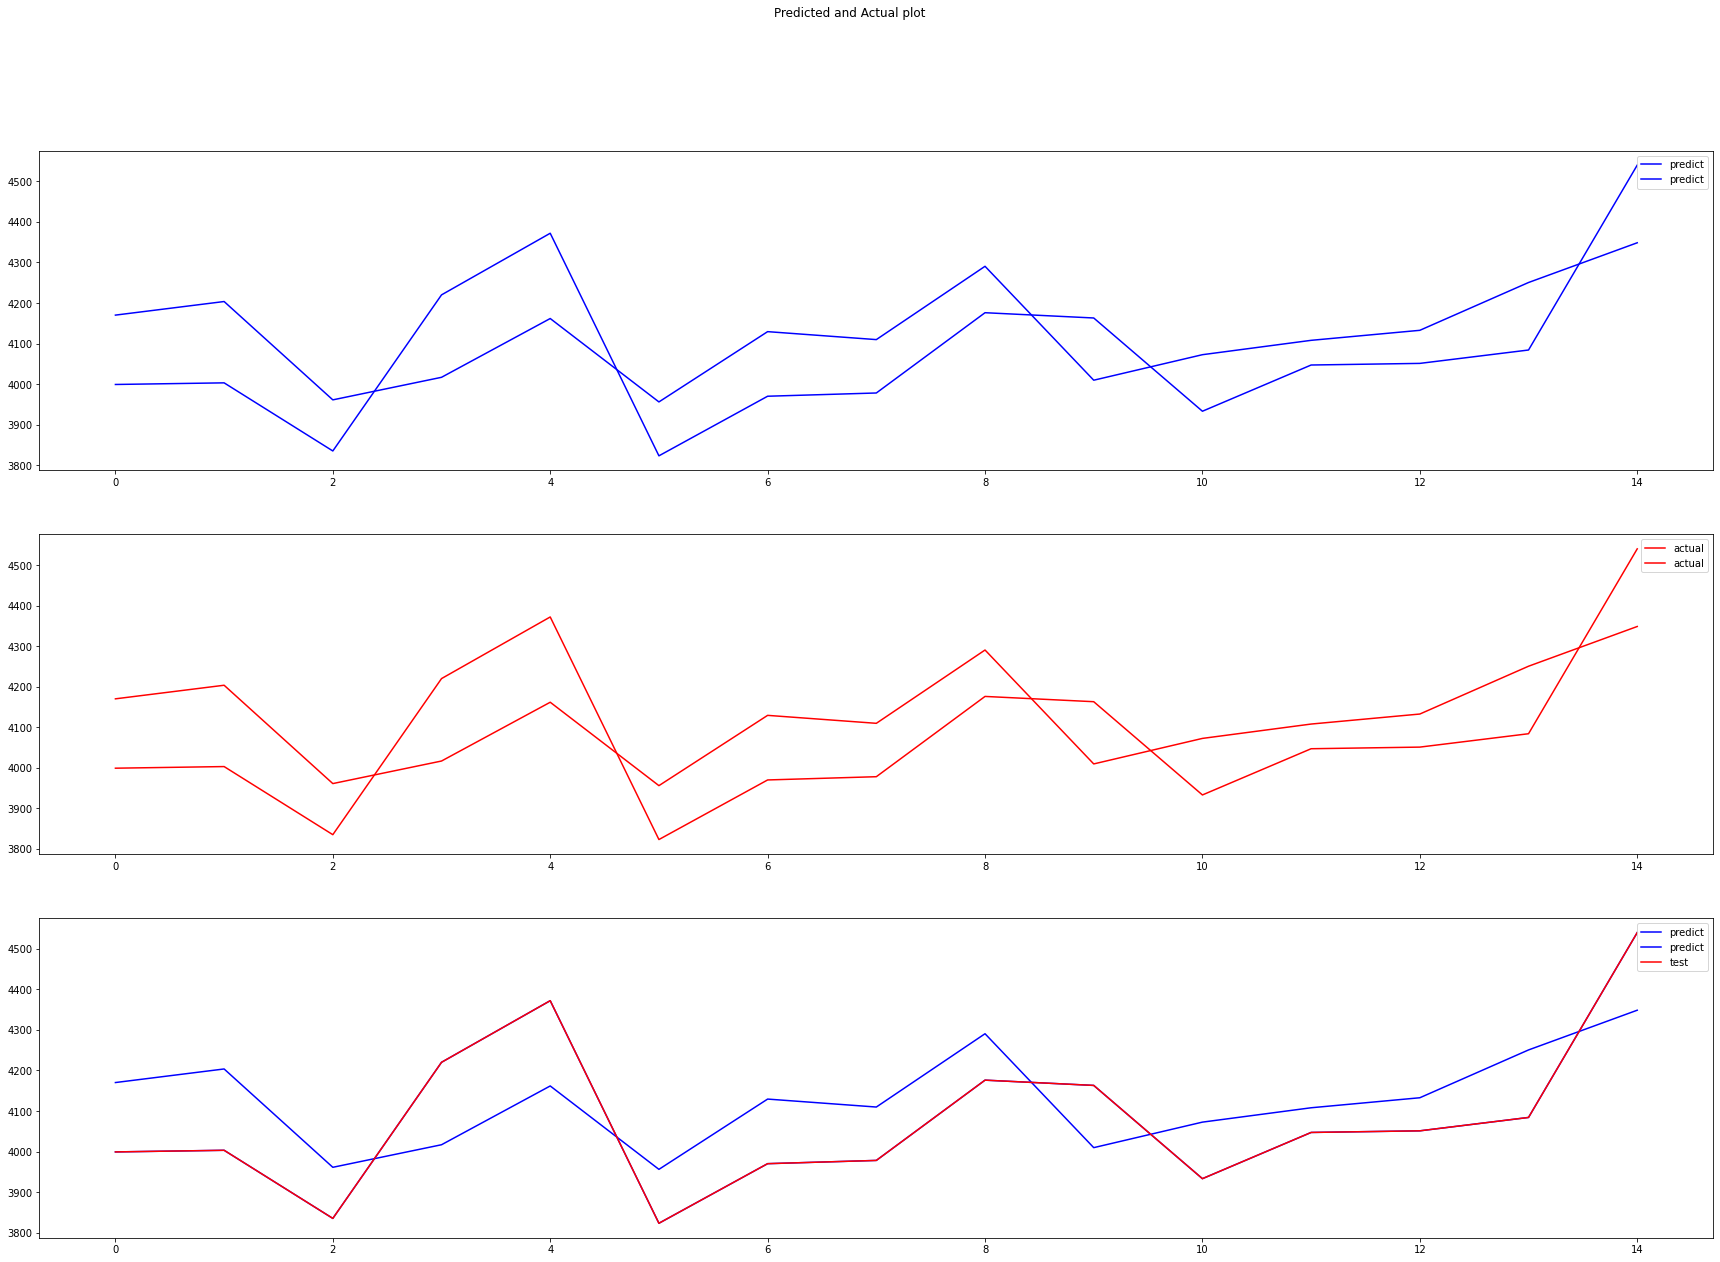

In [70]:
visualization(ind_df_pred)